In [1]:
%load_ext lab_black

# DBSCAN

In [2]:
import os

os.chdir("../..")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from utils.read_final_data import read_train_test_data
from utils.visualisation import get_metrics_of_model, plot_clustering
from models.metrics import metrics_list
import pickle as pkl

In [4]:
X_train, X_test = read_train_test_data()
df_train, df_test = (
    pd.read_pickle("resources/data/train_data.pkl"),
    pd.read_pickle("resources/data/test_data.pkl"),
)

In [5]:
pca = PCA(n_components=50)
X_train_reduced, X_test_reduced = pca.fit_transform(X_train), pca.fit_transform(X_test)

In [6]:
min_pts = X_train_reduced.shape[1] * 2

In [7]:
def plot_eps(min_pts: int, X: np.ndarray) -> None:
    nbrs = NearestNeighbors(n_neighbors=min_pts).fit(X)
    distances, indices = nbrs.kneighbors(X)
    distance_dec = sorted(distances[:, min_pts - 1], reverse=True)
    fig = plt.figure(figsize=(9, 6))
    ax1 = fig.add_subplot(111)

    plt.xlabel("Index after sorting")
    plt.ylabel(f"Distance to {min_pts-1}. neighbour")
    ax1.plot(list(range(1, X.shape[0] + 1)), distance_dec)

    plt.xscale("log")
    plt.grid(axis="y")

    plt.show()

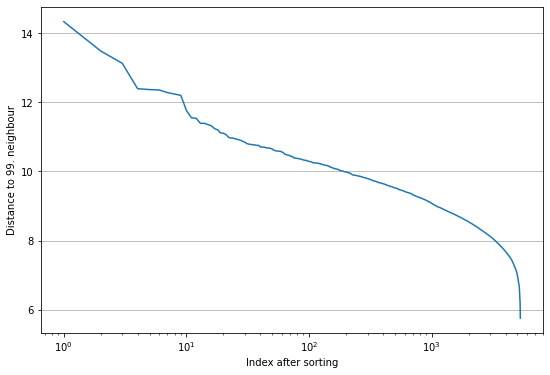

In [8]:
plot_eps(min_pts, X_train_reduced)

In [9]:
eps = 6

In [13]:
dbscan = DBSCAN(eps, min_samples=5)
dbscan.fit(X_train_reduced)

DBSCAN(eps=6)

In [14]:
print(np.sum(dbscan.labels_ == -1) / dbscan.labels_.shape[0])
np.unique(dbscan.labels_).shape[0]

0.8003791469194312


5

In [ ]:
get_metrics_of_model(dbscan, metrics_list, X_train, X_test)

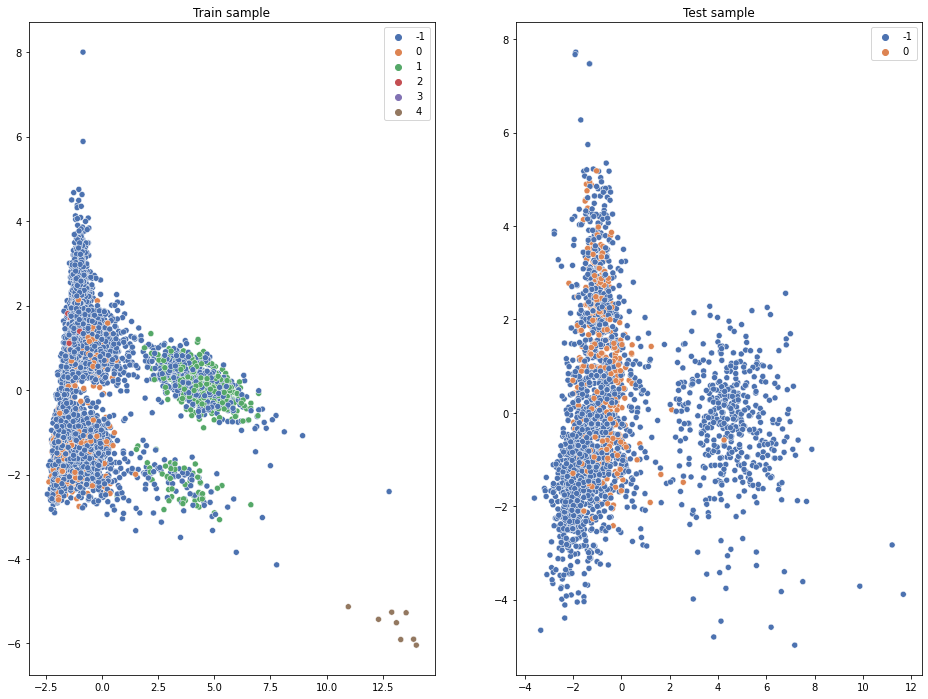

In [ ]:
plot_clustering(dbscan, X_train_reduced, X_test_reduced)